In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
pip install keras.preprocessing.text

ERROR: Could not find a version that satisfies the requirement keras.preprocessing.text (from versions: none)
ERROR: No matching distribution found for keras.preprocessing.text


In [12]:
import pandas as pd

tweets = pd.read_csv('/content/drive/MyDrive/Deep-Learning/Deep-Learning/(14) تصنيف الشخصيات بالاعتماد على تغريداتهم/tweets.csv', encoding = "utf-8")

tweets.head()

,tweet,topic
0,@sssdddnnn333 @MohammedAlDeaye حارس حتى عنده ض...,Sports
1,RT @fahadaljehani: الكثير من المتعة كانت حاضره...,Sports
2,RT @aboaljorya: @AhmedAllshehri عذيب 👀\nالسعر ...,Business
3,RT @salem_d29: الحمدلله ، شعوري لا يوصف ، ولن ...,Sports
4,أبل أبدعت بهذي الميزة الأمر مستحيل ومجرد خيال ...,Technology


In [13]:
print('Data size:', tweets.shape)

Data size: (26747, 2)


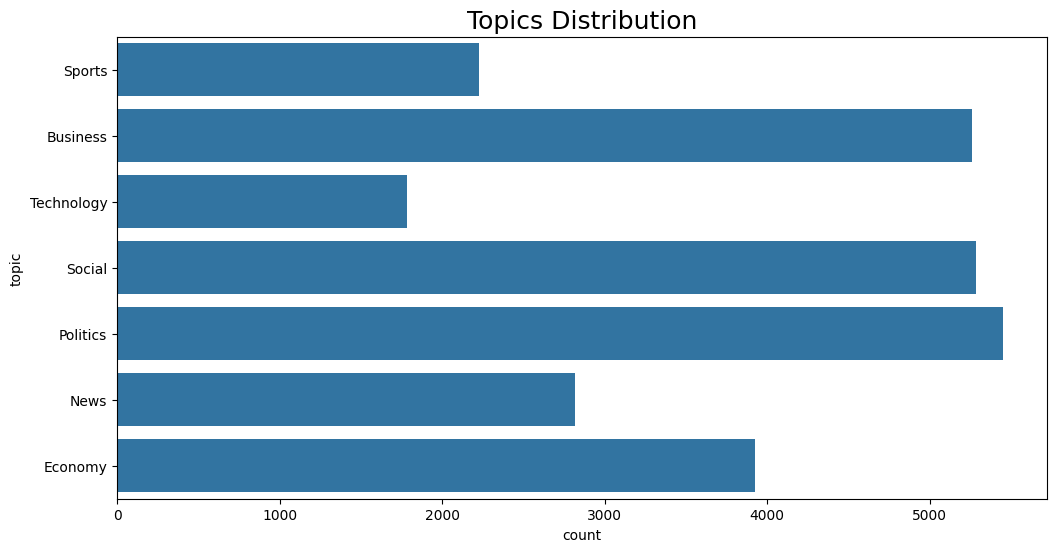

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.countplot(data=tweets, y='topic')
plt.title('Topics Distribution', fontsize=18)

plt.show()

In [15]:
import string
import re
import nltk

nltk.download('punkt')

nltk.download('stopwords')

nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from snowballstemmer import stemmer

def remove_chars(text, del_chars):
    for char in del_chars:
        text = text.replace(char, "")
    return text

def remove_repeating_char(text):
    return re.sub(r'(.)\1{2,}', r'\1', text)

def clean_tweet(tweet):

    emoj = re.compile("["
            u"\U0001F600-\U0001F64F"
            u"\U0001F300-\U0001F5FF"
            u"\U0001F680-\U0001F6FF"
            u"\U0001F1E0-\U0001F1FF"
            u"\U00002500-\U00002BEF"
            u"\U00002702-\U000027B0"
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001f926-\U0001f937"
            u"\U00010000-\U0010ffff"
            u"\u2640-\u2642"
            u"\u2600-\u2B55"
            u"\u200d"
            u"\u23cf"
            u"\u23e9"
            u"\u231a"
            u"\ufe0f"
            u"\u3030"
            u"\u2066"
                        "]+", re.UNICODE)

    tweet =  re.sub(emoj, '', tweet)


    tweet = re.sub("@[^\s]+","",tweet)

    tweet = re.sub("RT","",tweet)

    tweet = re.sub(r"(?:\|http?\://|https?\://|www)\S+", "", tweet)

    tweet = re.sub(r'[0-9]+', '', tweet)

    tweet = remove_chars(tweet, "٠١٢٣٤٥٦٧٨٩")


    arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''

    english_punctuations = string.punctuation

    punctuations_list = arabic_punctuations + english_punctuations
    tweet = remove_chars(tweet, punctuations_list)

    tweet = remove_repeating_char(tweet)

    tweet = tweet.replace('\n', ' ')

    tweet = tweet.strip(' ')
    return tweet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [16]:
def tokenizingText(text):
    tokens_list = word_tokenize(text)
    return tokens_list

def filteringText(tokens_list):

    listStopwords = stopwords.words('arabic')
    filtered = []
    for txt in tokens_list:
        if txt not in listStopwords:
            filtered.append(txt)
    return filtered

def stemmingText(tokens_list):

    ar_stemmer = stemmer("arabic")
    tokens_list = [ar_stemmer.stemWord(word) for word in tokens_list]
    return tokens_list

def toSentence(words_list):
    sentence = ' '.join(word for word in words_list)
    return sentence

In [17]:
def process_tweet(tweet):

    tweet=clean_tweet(tweet)

    tokens_list=tokenizingText(tweet)

    tokens_list=filteringText(tokens_list)

    tokens_list=stemmingText(tokens_list)
    return tokens_list

In [18]:
text= "أنا أحب الذهاب إلى الحديقة 🌝، كل يوم 9 صباحاً، مع رفاقي هؤلاء! @toto  "

processed_tweet= process_tweet(text)
print(processed_tweet)

['احب', 'ذهاب', 'حديق', 'يوم', 'صباح', 'رفاق']


In [19]:
tweets['tweet'] = tweets['tweet'].apply(process_tweet)

tweets

,tweet,topic
0,"[حارس, عند, ضعف, نظر, مدر, يحرص, عموم, حال, حا...",Sports
1,"[كثير, متع, كان, حاضر, ملعب, قيم, الفن, عاليه,...",Sports
2,"[عذيب, سعر, حال]",Business
3,"[حمدلله, شعور, يوصف, ولن, انسي, فضل, جمهور, هل...",Sports
4,"[ابل, ابدع, بهذ, ميز, امر, مستحيل, مجرد, خيال,...",Technology
...,...,...
26742,"[خير, سحب, مبلغ, الاف, ولم, تخرج, صراف, طريق, ...",Business
26743,"[صرف, ادو, ياخذ, اسبوع, لاسبوع, والادو, باق, ا...",Business
26744,"[جيت, قدم, لاغ, يوم, رقع, اسعار, تطبيق, مشكل, ...",Business
26745,"[حال, توف, مريض, مستشفي, حق, مطالب, ماليه, نرج...",Business


In [20]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler()

tweets, Y = oversample.fit_resample(tweets, tweets.topic)

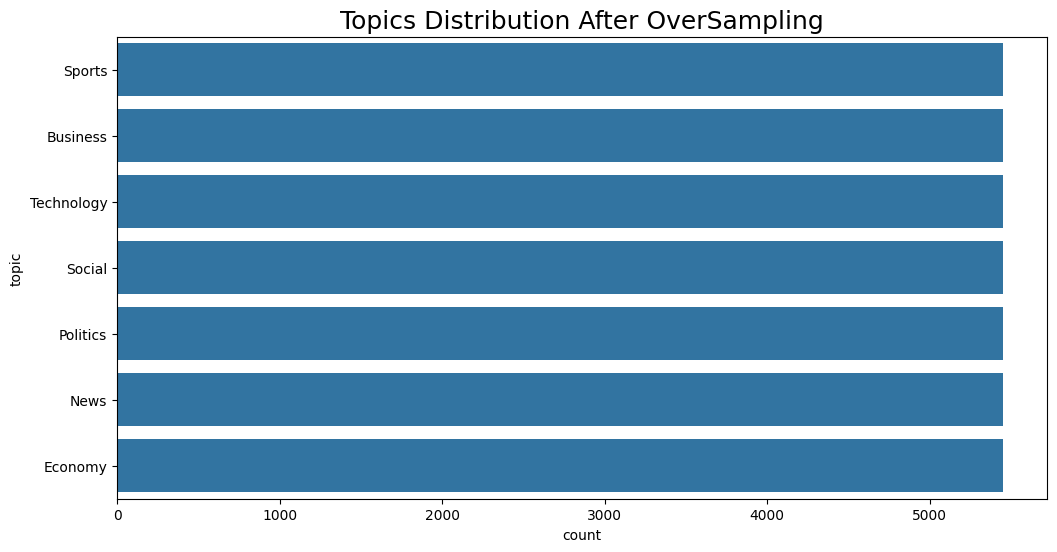

In [21]:
plt.figure(figsize=(12, 6))

sns.countplot(data=tweets, y='topic');
plt.title('Topics Distribution After OverSampling', fontsize=18)

plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder

le_topics = LabelEncoder()
tweets['topic'] = tweets[['topic']].apply(le_topics.fit_transform)

classes = le_topics.classes_

n_classes = len(classes)
print("No. of classes:", n_classes)
print("Classes:", classes)
print("Coding: ", le_topics.transform(classes))

No. of classes: 7
Classes: ['Business' 'Economy' 'News' 'Politics' 'Social' 'Sports' 'Technology']
Coding:  [0 1 2 3 4 5 6]


In [23]:
sentences = tweets['tweet'].apply(toSentence)

sentences

,tweet
0,حارس عند ضعف نظر مدر يحرص عموم حال حال لاعب هل...
1,كثير متع كان حاضر ملعب قيم الفن عاليه سالمالدو...
2,عذيب سعر حال
3,حمدلله شعور يوصف ولن انسي فضل جمهور هلال عل شخ...
4,ابل ابدع بهذ ميز امر مستحيل مجرد خيال سنة ايبا...
...,...
38145,ابل ابدع بهذ ميز امر مستحيل مجرد خيال سنة ايبا...
38146,يوجد ازرار اضاف مجموع ازرار مسابق مستقبلTECH
38147,ابل ابدع بهذ ميز امر مستحيل مجرد خيال سنة ايبا...
38148,وفي ناس حين تشتر هواو دون خدما قوقل تثب تطبيقا...


In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()

tokenizer.fit_on_texts(sentences)
num_words = len(tokenizer.word_counts)
print("Number of words:", num_words)

Number of words: 21984


In [25]:
max_words = 10000

tokenizer = Tokenizer(num_words=max_words )

tokenizer.fit_on_texts(sentences)

X = tokenizer.texts_to_sequences(sentences)

In [26]:
print(X[0])
print(X[1])

[2582, 48, 1575, 227, 1417, 4954, 2502, 163, 163, 631, 2, 4123, 3876, 163]
[302, 1861, 246, 3630, 2782, 186, 312, 9331, 9332, 538, 2123, 6288, 161]


In [27]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 50

X = pad_sequences(X, maxlen=max_len)
print(X[0])
print(X[1])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0 2582   48 1575  227 1417 4954
 2502  163  163  631    2 4123 3876  163]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0  302 1861  246 3630 2782
  186  312 9331 9332  538 2123 6288  161]


In [28]:
tweets

,tweet,topic
0,"[حارس, عند, ضعف, نظر, مدر, يحرص, عموم, حال, حا...",5
1,"[كثير, متع, كان, حاضر, ملعب, قيم, الفن, عاليه,...",5
2,"[عذيب, سعر, حال]",0
3,"[حمدلله, شعور, يوصف, ولن, انسي, فضل, جمهور, هل...",5
4,"[ابل, ابدع, بهذ, ميز, امر, مستحيل, مجرد, خيال,...",6
...,...,...
38145,"[ابل, ابدع, بهذ, ميز, امر, مستحيل, مجرد, خيال,...",6
38146,"[يوجد, ازرار, اضاف, مجموع, ازرار, مسابق, مستقب...",6
38147,"[ابل, ابدع, بهذ, ميز, امر, مستحيل, مجرد, خيال,...",6
38148,"[وفي, ناس, حين, تشتر, هواو, دون, خدما, قوقل, ت...",6


In [29]:
y = tweets['topic']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [31]:
from keras.models import Sequential

from keras.layers import Embedding, Dense, LSTM

embed_dim = 32
hidden_unit = 16
dropout_rate = 0.2

model = Sequential()

model.add(Embedding(input_dim = max_words, output_dim = embed_dim, input_length = max_len))

model.add(LSTM(units = hidden_unit, dropout=dropout_rate))

model.add(Dense(units = len(classes), activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [32]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam', metrics = ['accuracy'])

In [33]:
history = model.fit(X_train, y_train,
                             epochs=10, batch_size=32,
                             validation_data=(X_test, y_test))

Epoch 1/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.5957 - loss: 1.2268 - val_accuracy: 0.8795 - val_loss: 0.4105
Epoch 2/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.9108 - loss: 0.3114 - val_accuracy: 0.9078 - val_loss: 0.3172
Epoch 3/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.9495 - loss: 0.1768 - val_accuracy: 0.9156 - val_loss: 0.3007
Epoch 4/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.9673 - loss: 0.1200 - val_accuracy: 0.9178 - val_loss: 0.2988
Epoch 5/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.9754 - loss: 0.0890 - val_accuracy: 0.9235 - val_loss: 0.2999
Epoch 6/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.9817 - loss: 0.0667 - val_accuracy: 0.9223 - val_loss: 0.3168
Epoch 7/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.9822 - loss: 0.0612 - val_accuracy: 0.9225 - val_loss: 0.3390
Epoch 8/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.9860 - loss: 0.0485 - 

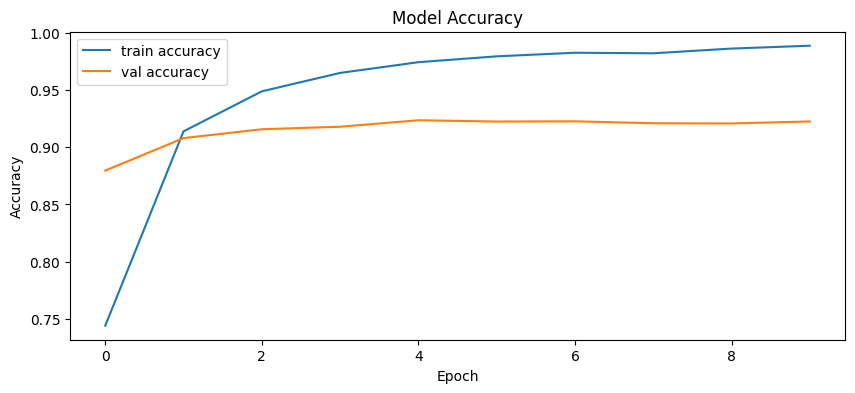

In [34]:
fig, ax = plt.subplots(figsize = (10, 4))

ax.plot(history.history['accuracy'], label = 'train accuracy')
ax.plot(history.history['val_accuracy'], label = 'val accuracy')

ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'upper left')

plt.show()

In [35]:
model.save('perosn_classification_model.keras')

import pickle
tokenizer_path = 'perosn_classification_tokenizer'
with open(tokenizer_path, 'wb') as file:
    pickle.dump(tokenizer, file)

In [36]:
import numpy as np

def classify_tweet(tweet, model, tokenizer, max_len=50):

    seq = tokenizer.texts_to_sequences([tweet])

    pseq = pad_sequences(seq, maxlen=max_len)

    predections = model.predict(pseq)

    pred=np.argmax(predections)
    return pred

In [37]:
from keras.models import load_model
import pickle
classes= ['Business', 'Economy', 'News', 'Politics', 'Social', 'Sports', 'Technology']

def classify_person(person_name,model_path, tokenizer_path, person_path):

    model = load_model(model_path)

    with open(tokenizer_path, 'rb') as file:
        tokenizer = pickle.load(file)

    df = pd.read_csv(person_path)

    classes_count=dict()

    for i in range(len(classes)):
        key=classes[i]
        classes_count[key]=0

    for _, row in df.iterrows():
        tweet=row['tweet']

        processed_tweet=process_tweet(tweet)

        code= classify_tweet(processed_tweet, model, tokenizer)

        topic=classes[code]

        classes_count[topic]=classes_count[topic]+1


    x = classes_count.keys()
    y = classes_count.values()

    import matplotlib.pyplot as plt
    # pie
    plt.figure(figsize=(5,5))
    plt.title(person_name, fontdict = {'fontsize':20})
    plt.pie(y, labels = x,autopct='%1.1f%%')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━

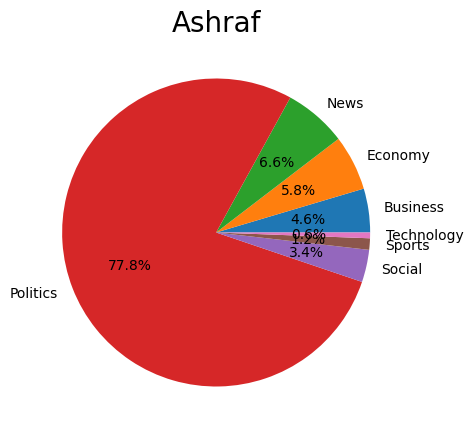

In [46]:
classify_person("Ashraf", '/content/perosn_classification_model.keras',
                '/content/perosn_classification_tokenizer',
                '/content/drive/MyDrive/Deep-Learning/Deep-Learning/(14) تصنيف الشخصيات بالاعتماد على تغريداتهم/ashraf.csv')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━

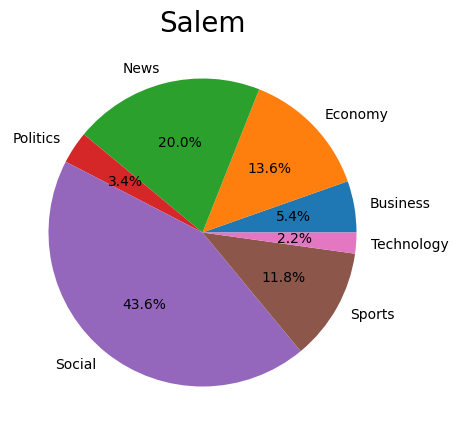

In [45]:
classify_person("Salem",
                '/content/perosn_classification_model.keras',
                '/content/perosn_classification_tokenizer',
                '/content/drive/MyDrive/Deep-Learning/Deep-Learning/(14) تصنيف الشخصيات بالاعتماد على تغريداتهم/salem.csv')